In [7]:
import cv2
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from tifffile import imread, imwrite

# 1. Define Differential Entropy

https://stats.stackexchange.com/questions/235270/entropy-of-an-image

https://arxiv.org/ftp/arxiv/papers/1609/1609.01117.pdf

In [1]:
def differentiate(d, axis=0):
    # differential data
    d_diff = (np.roll(d, 1, axis=axis) - d)[1:-1, 1:-1]
    return d_diff

def entropy(labels, axis=None):
    value, counts = np.unique(labels, axis=axis, return_counts=True)
    norm_counts = counts / counts.sum()
    return -(norm_counts * np.log(norm_counts)).sum()

In [2]:
def H_image(d):
    d_x, d_y = differentiate(d, axis=0), differentiate(d, axis=1)
    d_xy = np.stack([d_x, d_y], axis=2)
    d_xy = d_xy.reshape((d_xy.shape[0] * d_xy.shape[1], 2))
    return (2/3) * entropy(d_xy, axis=0)


## 2. Comparing different heights

In [6]:
image = Image.open(f"matching_images/low/extract/green_template_matched_region.tif")

FileNotFoundError: ignored

In [8]:
os.path.isfile(f"matching_images/low/extract/green_template_matched_region.tif")

['.config', 'sample_data']

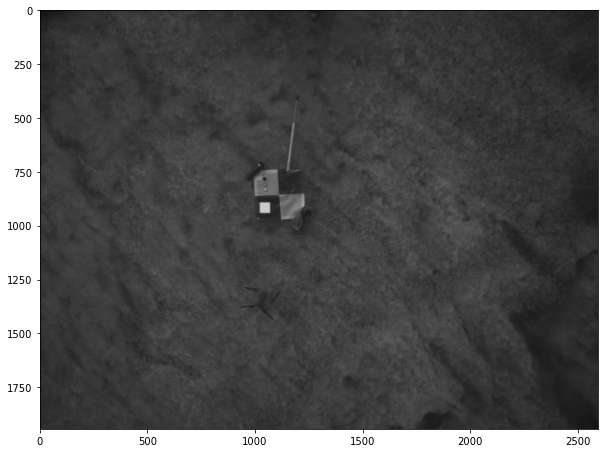

In [ ]:
image_nir = Image.open('data/NIR.png')
plt.imshow(image_nir, cmap='Greys_r')

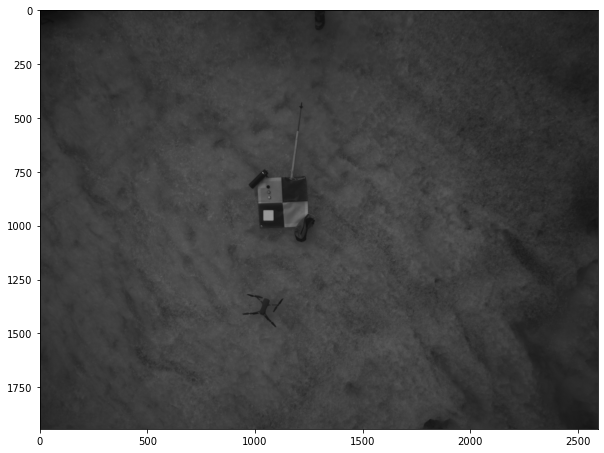

In [ ]:
image_re = Image.open('data/RE.png')
plt.imshow(image_re, cmap='Greys_r')

In [ ]:
data_nir = np.array(image_nir, dtype=np.int32)
data_re = np.array(image_re, dtype=np.int32)

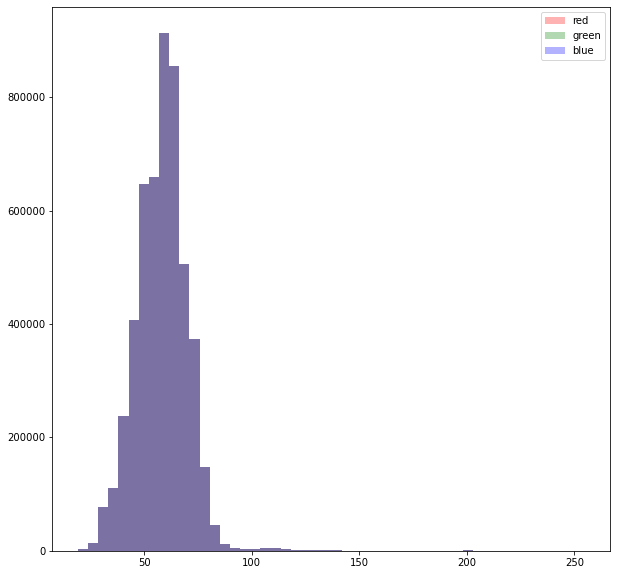

In [ ]:
plot_distrib(image_nir)

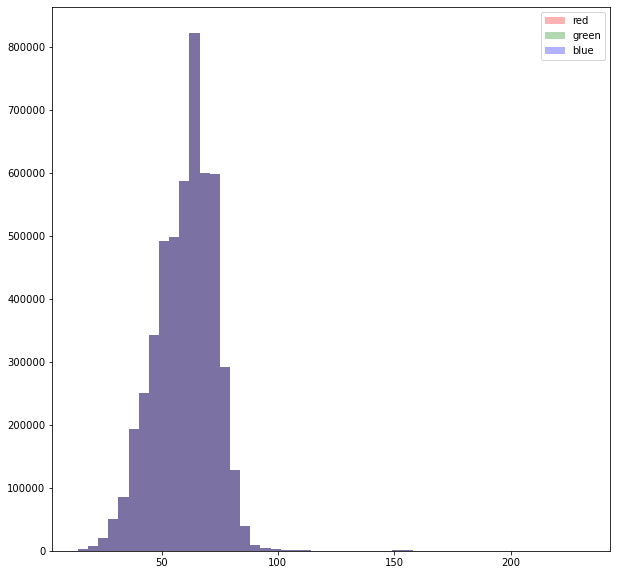

In [ ]:
plot_distrib(image_re)

In [ ]:
(data_nir[:, :, 1]!=data_nir[:, :, 0]).sum()

0

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


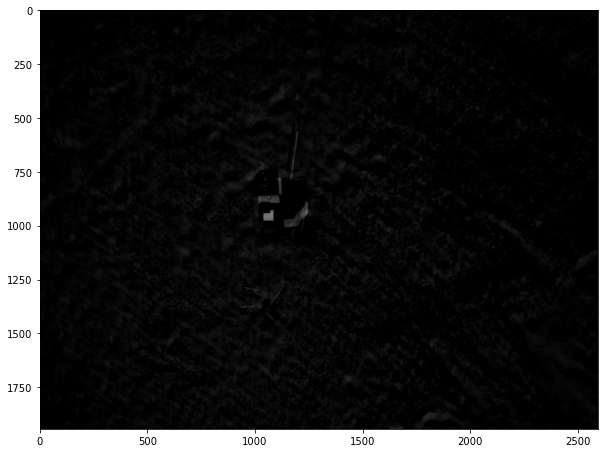

In [ ]:
plt.imshow(data_re - data_nir, cmap='Greys_r')